# Cyclistic case study
Author: Juan Martinez

## Summary
Cyclistic is a fictional startup which launched a successful bike-sharing program in 2016 with a fleet of 5,824 bikes and 692 stations across Chicago. The bikes can be picked up and returned to any station anytime. Cyclistic's marketing strategy has focused on appealing to a broad audience with flexible pricing options for single-ride, full-day, and annual passes.
The company's finance analysts have determined that annual members are more profitable than casual riders, and their goal is to convert casual riders into members. To do this, the marketing team wants to better understand the differences between the two groups and use data analysis to identify trends.

# 1.- Ask

### Key Stakeholders.
* Lily Moreno: Director of marketing and manager.
* Cyclistic marketing analytics team.
* Cyclistic executive team.

### Business task.

Identify the differences between “casual” and “member” users, in order to build marketing strategies to convince casual users to turn into members.

# 2.-Prepare

### Dataset used.
The data is public data provided by Motivate International Inc. Under a license agreement made between Lyft Bikes and Scooters, LLC. and the city of Chicago. The license can be read [here](https://ride.divvybikes.com/data-license-agreement).

### Information about our dataset.
Data is available from april 2021 to march 2022. Every dataset files are in CSV format, and divided between the months.

### Data organization.
For our purpose, we will use all the data available. 

# 3.- Process
### Loading the datasets

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv
/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv


In [3]:
april_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv')
may_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv')
june_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv')
july_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv')
august_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv')
september_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv')
october_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv')
november_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv')
december_21 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv')
january_22 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv')
february_22 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv')
march_22 = pd.read_csv('/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv')

### Combining the datasets

In [4]:
df = pd.concat([april_21,may_21,june_21,july_21,august_21,september_21,october_21,november_21,december_21,january_22,february_22,march_22])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


### Overall information about the dataset
Let's check some information about our dataset

In [5]:
df.shape

(5723532, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


### Cleaning

Checking null values and duplicates

In [7]:
# Cheking for duplicate values
df['ride_id'].duplicated().sum()

0

In [8]:
# Checking for null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

In [9]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

We see a high number of null values in some columns, but what percentage of the data is missing?

In [10]:
# Calculating the percentage of null values
print('The percentage of missing values is:',round((df.isna().sum().max() * 100)/df.shape[0],2),'%')

The percentage of missing values is: 13.91 %


13% of the data is missing, just counting the columns where there is the highest number of null values. 13% is a big deal and by that measure, our analysis could be considered bias.
However, this columns contain information about the name, and id of the station where the ride began and ended. Although of some value, it is not critical information for our analysis.
That's why I decide to keep these missing values, since we are not going to use these variables, instead of deleting the rows containing those missing values, which could endanger the analysis.

### Formatting columns

I'll check if the data types align with the desired formats for each columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


We see that the 'started_at' and 'ended_at' columns are Dtype objects, and should be dates. Let's change that

In [12]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

### Deleting wrong entries
Now we want to check if there are not false dates, or dates that were wrongly recorded

In [13]:
false_dates = df.loc[(df['started_at'] > df['ended_at'])]
false_dates.shape

(145, 13)

There are 145 wrong entries where the 'started_at' column has a datetime value lower than the correspondent 'ended_at' value.
This is not possible since the start of the trip hast to be an earlier date and time than the end of the trip.

In [14]:
#deleting the wrong entries 
df = df.drop(false_dates.index.to_list()).copy()

### Adding columns.
I will add some columns, like the length of the ride, the day of the week, the hour of the day, and the name of the month to use them later at the analysis phase

In [15]:
df['ride_length_min'] = ((df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)).astype('int32')

In [16]:
# Creating the name of the day of the week
df['day'] = df['started_at'].dt.day_name()

# creating the hour of the day
df['hour'] = df['started_at'].dt.hour

# Creating the month column
df['month'] = df['started_at'].dt.month

df['day_of_week'] = df['started_at'].dt.dayofweek

With the recently column created, we sort the values in ascending order

In [17]:
df.sort_values(by='ride_length_min',ascending=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week
298935,109E1D34D9F9E595,electric_bike,2021-11-10 18:34:28,2021-11-10 18:34:40,Rush St & Cedar St,KA1504000133,NaN,NaN,41.902464,-87.627802,41.900000,-87.630000,member,0,Wednesday,18,11,2
547654,44133F3A381849A9,electric_bike,2021-10-27 08:02:58,2021-10-27 08:03:00,St. Clair St & Erie St,13016,St. Clair St & Erie St,13016,41.894194,-87.622822,41.894208,-87.622864,casual,0,Wednesday,8,10,2
296317,80198B33C8BE45AB,electric_bike,2021-10-22 17:58:48,2021-10-22 17:59:12,Racine Ave & Fullerton Ave,TA1306000026,Racine Ave & Fullerton Ave,TA1306000026,41.925635,-87.658281,41.925636,-87.658291,member,0,Friday,17,10,4
547651,BB6EDF79EE465D8F,electric_bike,2021-10-30 18:43:21,2021-10-30 18:43:25,St. Clair St & Erie St,13016,St. Clair St & Erie St,13016,41.894314,-87.622590,41.894326,-87.622597,member,0,Saturday,18,10,5
547650,4D2296EA5BF64C5C,electric_bike,2021-10-24 13:12:04,2021-10-24 13:12:20,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,41.961347,-87.676225,41.961346,-87.676240,member,0,Sunday,13,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,49107,Thursday,19,7,3
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,52701,Saturday,23,6,5
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,53921,Sunday,2,5,6
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,55691,Friday,22,6,4


We see there are entries in which the rides lasted less than 1 minute. We'll check what percentage of the data represent this instance.

In [18]:
print('The percentage is:',df.query('ride_length_min == 0').shape[0] / df.shape[0] * 100)

The percentage is: 1.5590461216427505


With just a 1% percent, we can delete the rows which have less than 1 minute in ride length

In [19]:
zero_length = (df['ride_length_min'] < 1)
zero_length_index = df.loc[zero_length].index.to_list()
df = df.drop(axis=0,index=zero_length_index, inplace=False)

In [20]:
df.query('ride_length_min < 0')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week


# 4.- Analysis

Let's perform some exploratory and statistical analysis to our dataset, emphasizing the need to understand the bussines question.
The difference between member and casual users

### Describing the data
I'll take a quick look at the numerical data with the describe function

In [21]:
round(df.describe(),2)

,start_lat,start_lng,end_lat,end_lng,ride_length_min,hour,month,day_of_week
count,5033885.00,5033885.00,5029606.00,5029606.00,5033885.00,5033885.00,5033885.00,5033885.00
mean,41.90,-87.65,41.90,-87.65,21.45,14.23,7.33,3.16
std,0.05,0.03,0.05,0.03,179.18,5.06,2.54,2.00
min,41.64,-87.84,41.39,-88.97,1.00,0.00,1.00,0.00
25%,41.88,-87.66,41.88,-87.66,6.00,11.00,6.00,1.00
50%,41.90,-87.64,41.90,-87.64,11.00,15.00,7.00,3.00
75%,41.93,-87.63,41.93,-87.63,21.00,18.00,9.00,5.00
max,42.07,-87.52,42.15,-87.49,55944.00,23.00,12.00,6.00


The interesting part is the ride_length_min variable. I see that the max value is way higher than the 75 percentile, meaning that this could be an outlier, and here could be more.

We need to take this into account in our analisis

### Number of values
I will count the number of values for type of users and rideable type

In [22]:
# Count of member users and casual users
df['member_casual'].value_counts()

member    2779130
casual    2254755
Name: member_casual, dtype: int64

In [23]:
# Count of rideable types
df['rideable_type'].value_counts()

classic_bike     2861129
electric_bike    1902466
docked_bike       270290
Name: rideable_type, dtype: int64

### Grouping the data
I'll group the data by type of users and rideable type. This will be useful for further analysis

In [24]:
# Grouping by type of user
user_grp = df.groupby('member_casual')
# Grouping by type of rideable
rideable_grp = df.groupby('rideable_type')

### Max values

In [25]:
# Max ride length by user grp
print('max ride length by user group:')
print()
print(user_grp['ride_length_min'].max())

print()
print('max ride length by rideable type:')
print(rideable_grp['ride_length_min'].max())

max ride length by user group:

member_casual
casual    55944
member     1559
Name: ride_length_min, dtype: int32

max ride length by rideable type:
rideable_type
classic_bike      1559
docked_bike      55944
electric_bike      487
Name: ride_length_min, dtype: int32


We can see that the max for casual users, and specifically the one for docked bike is so big, making the math, 55944 is about 932 hours, I wonder if anyone is capable of riding a bike for that many hours.

That's clearly an outlier, but what about for the other type of bikes and users?

In [26]:
df.groupby(['member_casual','rideable_type'])['ride_length_min'].max()

member_casual  rideable_type
casual         classic_bike      1559
               docked_bike      55944
               electric_bike      487
member         classic_bike      1559
               electric_bike      480
Name: ride_length_min, dtype: int32

The maximum time for classic bike in both kind of users is 1599 which is about 26 hours, more than a day!. clearly an outlier if it's not someone doing a marathon.

And the maximum time for electric bike is 480, which translates to 8 hours. 


### Average and median values

In [27]:
# Average ride length by user group
user_grp['ride_length_min'].mean()

member_casual
casual    31.701661
member    13.130528
Name: ride_length_min, dtype: float64

In [28]:
# Median ride length by user group
user_grp['ride_length_min'].median()

member_casual
casual    16.0
member     9.0
Name: ride_length_min, dtype: float64

In [29]:
# Average ride length by rideable type
rideable_grp['ride_length_min'].mean()

rideable_type
classic_bike     19.576177
docked_bike      82.961090
electric_bike    15.525850
Name: ride_length_min, dtype: float64

In [30]:
# Median ride length by rideable type
rideable_grp['ride_length_min'].median()

rideable_type
classic_bike     12.0
docked_bike      28.0
electric_bike    10.0
Name: ride_length_min, dtype: float64

In [31]:
df.query('member_casual == "member"')['ride_length_min'].mode()

0    4
dtype: int32

### Frequency of values

I'm going to analyze the number of repeating values within the column of the ride length, to see where exactly the majority of values are,and what percentage of the data the outliers are

In [32]:
# I begin by creating a frequency table by grouping together the minutes in 40 bins
frequency_table = df.copy()
frequency_table['freq'] = pd.cut(df['ride_length_min'],40)
frequency = frequency_table.groupby('freq')['day_of_week'].count().reset_index
frequency

<bound method Series.reset_index of freq
(-54.943, 1399.575]      5030055
(1399.575, 2798.15]         3094
(2798.15, 4196.725]          164
(4196.725, 5595.3]            96
(5595.3, 6993.875]            76
(6993.875, 8392.45]           57
(8392.45, 9791.025]           43
(9791.025, 11189.6]           40
(11189.6, 12588.175]          52
(12588.175, 13986.75]         28
(13986.75, 15385.325]         25
(15385.325, 16783.9]          20
(16783.9, 18182.475]          15
(18182.475, 19581.05]         15
(19581.05, 20979.625]          9
(20979.625, 22378.2]          12
(22378.2, 23776.775]          10
(23776.775, 25175.35]         12
(25175.35, 26573.925]         11
(26573.925, 27972.5]           6
(27972.5, 29371.075]           5
(29371.075, 30769.65]          6
(30769.65, 32168.225]          4
(32168.225, 33566.8]           5
(33566.8, 34965.375]           5
(34965.375, 36363.95]          3
(36363.95, 37762.525]          0
(37762.525, 39161.1]           2
(39161.1, 40559.675]           4
(4

In [33]:
print('the majority of unbiased values fall within the',round((5030055/df.shape[0] * 100),1),'% of the data')

the majority of unbiased values fall within the 99.9 % of the data


the max value which is part of the 99.9% of the data is 1399.57 minutes, that's still 23 hours in length for a ride. we can still filter the data even more by just using the 99.5% or 99.0% of values

With this information we can state that the outliers only represent the 0.1% of values in the data, however, since the range is very large between the minimum and maximum values, we can say that the averages could be somewhat affected by this outliers. In this case we need to take that into acount by the time of sharing our insights

# 5.- Share

In [34]:
yellow = '#e1f26b'
blue = '#4594a4'
green = '#9ccc84'
gray = '#d3e6ea'
lblue ='#9ccbd4'
white = '#FFFFFF'

### Outliers in ride length

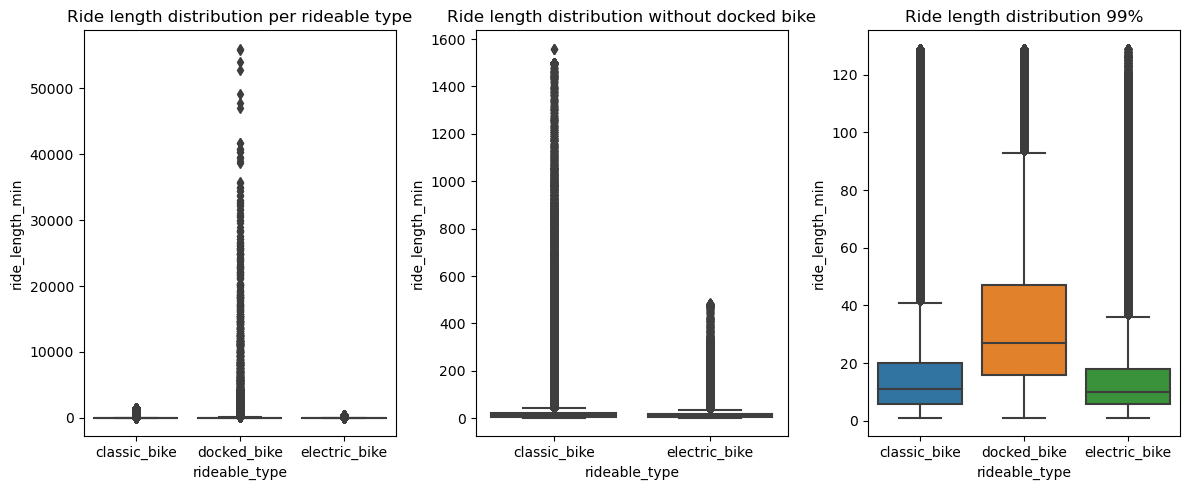

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,5),sharex=False)

plt.subplot(1,3,1)
ax1 = sns.boxplot(data=df,x='rideable_type',y='ride_length_min')
ax1.set_title('Ride length distribution per rideable type')

# Filtering out the docked_bike value
no_docked_bike = df.query('rideable_type != "docked_bike"')

plt.subplot(1,3,2)
ax2 = sns.boxplot(data = no_docked_bike, x='rideable_type', y='ride_length_min')
ax2.set_title('Ride length distribution without docked bike')

# Filtering our the 1% of values
percent_99 = np.percentile(df['ride_length_min'],99)
df_99 = df.loc[(df['ride_length_min'] <= percent_99)]

plt.subplot(1,3,3)
ax3 = sns.boxplot(data=df_99,x='rideable_type',y='ride_length_min')
ax3.set_title('Ride length distribution 99%')

plt.tight_layout()
plt.show()

We can see that for the type of docked bike, the ride length in minutes get way higher than those for the classic and electric bike, so the data is biased with many outliers.

For the classic bike and electric bike it seems there are not that many outliers, but after a closer look, we see in the second graph that there are many outliers as well, ranging up to 1600 minutes.

In the third graph we eliminate the 1% of values which exceed the normal distribution, so that we can see better the distribution and percentiles. Also confirms visually what we already know about the median of the ride length for the rideable type.

* 12 minutes for the classic bike
* 28 minutes for the docked bike
* 10 minutes for the electric bike

Also close to the average if we eliminate that 0.1% or up to 1% of very extreme values. These lengths are closer to what an actual user is expected to spend riding a bike every time they use the service.   

### Ride length per weekday

Let's see what is the difference between users in terms of ride length per day

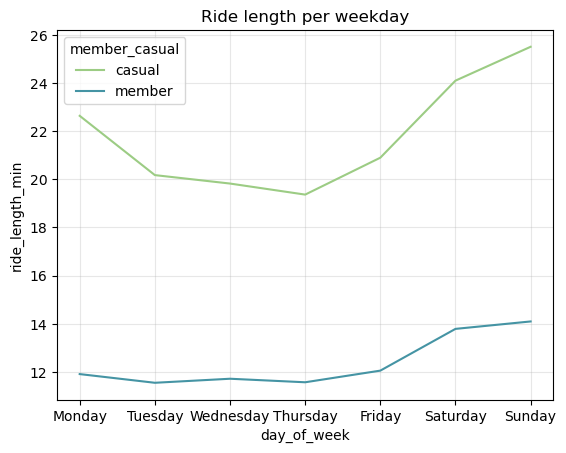

In [36]:
weekday_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax= plt.subplots(1,1)
day_grp = df_99.groupby(['member_casual','day_of_week']).mean().reset_index()
sns.lineplot(data=day_grp, x='day_of_week',y='ride_length_min',hue='member_casual',palette=[green,blue],sizes=[20,20])
ax.set_xticks(range(len(weekday_name)))
ax.set_xticklabels(weekday_name)

plt.title('Ride length per weekday')
plt.grid(visible=True,alpha=0.3)

plt.show()

We can see that the casual users average ride length fall during weekdays and rise during the weekends.

The member users although also having an increase during the weekends, during weekdays(monday to friday) the tendency is flat around 12 minutes on average.

### Percentage of member and casual users 

What is the proportion of member and casual users from the total?

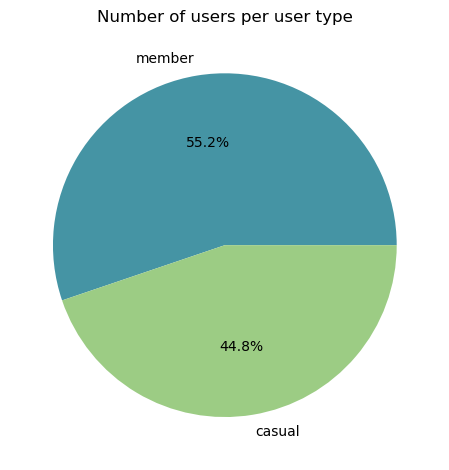

In [37]:
users = df['member_casual']

plt.pie(users.value_counts(),labels=users.unique(),colors=[blue,green],autopct="%1.1f%%")

plt.title('Number of users per user type')
plt.tight_layout()
plt.show()

### Number of rides per user type

How many rides each type of user did? and for every type of rideable?

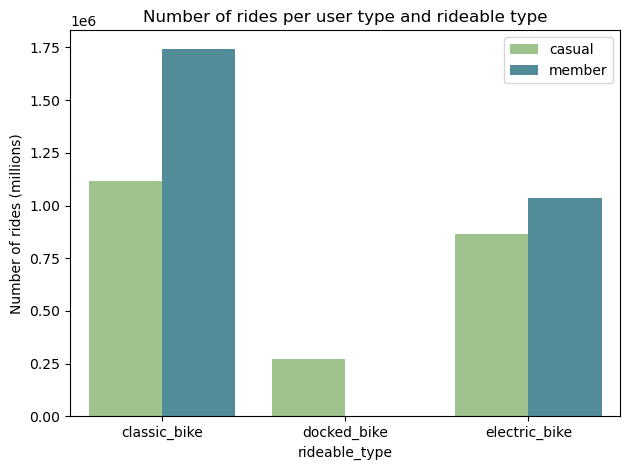

In [38]:
ride_user_grp = df.groupby(['member_casual','rideable_type'])['ride_id'].count().reset_index(name='count')

ax = sns.barplot(data=ride_user_grp,x='rideable_type',y='count',hue='member_casual',palette=[green,blue],hue_order=['casual','member'])
                
plt.ylabel('Number of rides (millions)')

plt.legend()
plt.title('Number of rides per user type and rideable type')
plt.tight_layout()

plt.show()

We can see that the members ride more often than casual members in both classic and electric bikes, and we also see a lack of usage of the docked bikes by members

### Number of rides per month

What are the tendencies in the number of rides each type of user did each month?

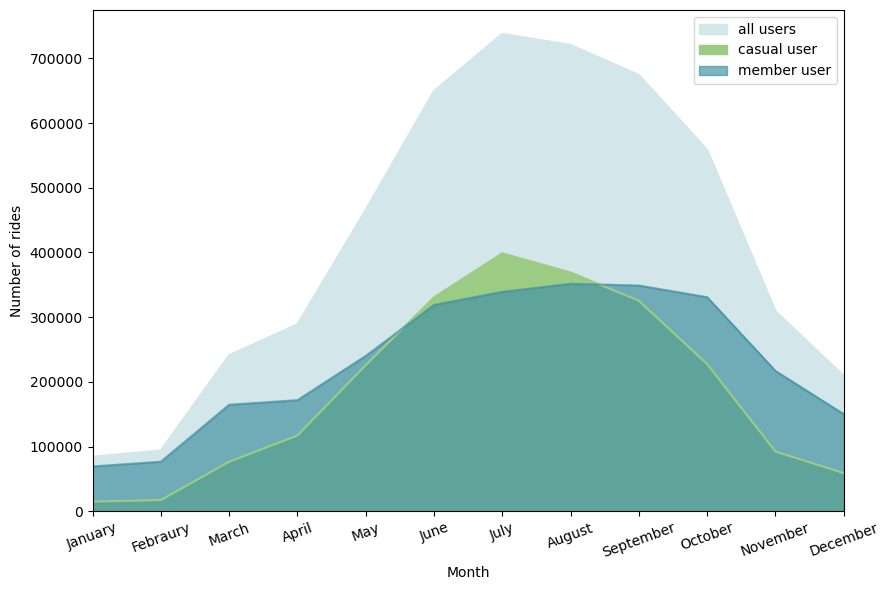

In [39]:
months = ['','January','Febraury','March','April','May','June','July','August','September','October','November','December']

fig, ax =plt.subplots(1,1,figsize=(9,6))

df['month'].value_counts().sort_index().plot(kind='area', label='all users',color=gray,alpha=1)
df.query('member_casual == "casual"')['month'].value_counts().sort_index().plot(kind='area', label='casual user',color=green,alpha=1)
df.query('member_casual == "member"')['month'].value_counts().sort_index().plot(kind='area', label='member user',color=blue,alpha=0.7)

ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)

plt.xlim([1,12])
plt.xticks(rotation=20)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.tight_layout()
plt.show()

For all type of users, we see the rise in spring months, the spike during the summer months. And the fall entering autumn and the bottom at winter.

But we also see that the members tend to maintain the number of rides for the summer and autumn seasons. And on the contrary, the casual users take the lead in the mid-summer and then the number of rides fall faster than those for members.

### Number of rides per weekday

Are there any tendencies in the number of rides per each day of the week?

Text(0.5, 1.0, 'Number of rides per day')

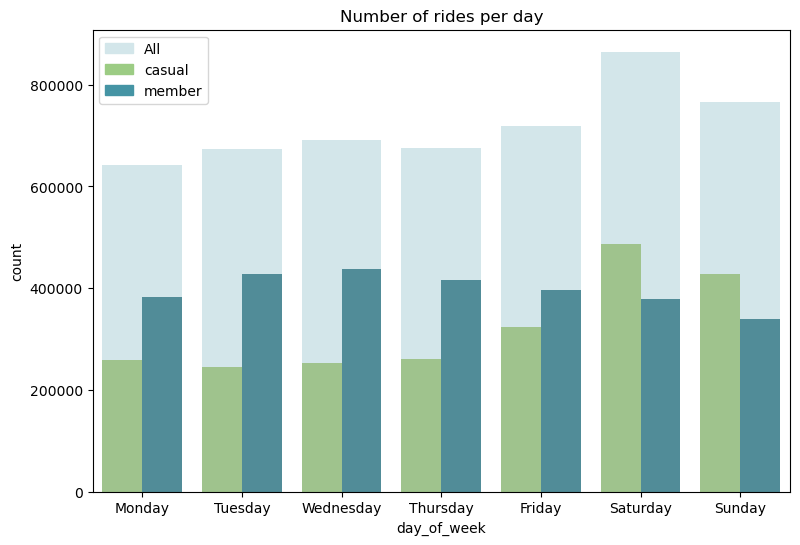

In [40]:
import matplotlib.patches as mpatches

fig, ax =plt.subplots(1,1,figsize=(9,6))

ride_per_day = df['started_at'].dt.dayofweek.value_counts().sort_index(ascending=True).to_frame()
user_day = user_grp['day_of_week'].value_counts().rename_axis(['member_casual','day_of_week']).reset_index(name='count')

user_palette = {'casual':'tab:green', 'member':'tab:blue'}
plt.bar(ride_per_day.index,ride_per_day['started_at'],color=gray)
sns.barplot(data=user_day,x='day_of_week',y='count',hue='member_casual',palette=[green,blue],hue_order=['casual','member'])

ax.set_xticks(range(len(weekday_name)))
ax.set_xticklabels(weekday_name)

all_legend = mpatches.Patch(color=(gray), label='All')
casual_legend = mpatches.Patch(color=(green), label='casual')
member_legend = mpatches.Patch(color=(blue),label='member')

plt.legend(handles=[all_legend,casual_legend,member_legend])

plt.title('Number of rides per day')

We can observe some tendencies. In aggregate for all users and specially for casual users, the number of rides increase the weekends. But for members the tendency is flat and constant during the whole week, even drops slightly during weekends

### Maps

Finally I will show two maps to try answering the question: In what areas do casual and member users tend to ride?

In [41]:
import plotly.express as px

df_sample = df.sample(n=5000)
df_20 = df.dropna().sample(n=100).sort_values(by=['member_casual','started_at']).reset_index(drop=True)

fig_1= px.scatter_mapbox(df_sample,lat='start_lat',lon='start_lng',color='member_casual',opacity=1,zoom=9,
                         color_discrete_sequence=[lblue,green],title='User clustering')

#fig = px.line_geo(df_20,lat='start_lat',lon='start_lng')

fig_1.update_layout(mapbox_style='carto-positron')

fig_1.show()

print()

fig2 = px.scatter_mapbox(df_20, lat="start_lat", lon="start_lng",
                        hover_name=df_20.index,opacity=1,zoom=9,title='User paths')
fig2.update_layout(mapbox_style="carto-positron")
#fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

tsp = list(range(1,100))

fig2.add_traces(px.line_mapbox(df_20.loc[tsp], lat="start_lat", lon="start_lng",color='member_casual',color_discrete_sequence=[green,lblue]).data)
fig2.show()

You can see in the first map, that casual users tend to cluster in the city center, whereas the member users are more scattered in the outskirts of the city.

In the second map we can see the paths taken from users out of a random sample of the Data. This map shows a somewhat regular path the member users take, in and out the city center. By contrast, casual users take more irregular paths all around the city.

This information could imply that although both users share some paths and cluster in similar areas, casual users tend to ride more in leisure areas where there are parks and sometimes to explore all around the city, and member users follow more straightforward paths from the suburbs into the city center and vice-versa, meaning they might use it more for commuting to work

# 6.- Act

### Conclusion

With these findings we can give some insights and answer the question to the core business task: Indentify the differences between "Casual" and "Member" users.

1. Casual users ride on average longer than member users, but member users ride length doesn't fluctuate as much during the week.
2. Member users ride more often than casual riders, except on weekends and during the peak of the summer.
3. Member users follow predictable paths from and to the city center, whereas Casual users ride closer to leisure areas and follow less predictable paths.

Without more information about the users, like age, job, or gender, we can only infer by the data provided.

### Suggestion

I would suggest focusing on targeting casual users, showing the benefits of becoming a member user, such as making a good environmental impact by using bike sharing to commute to work instead of using other types of transportation, or how much money they can save by becoming members and still use the service for both leisure and other type of activities.

Thanks for reading my case study. I hope you found it useful, and any comments are welcome.